<a href="https://colab.research.google.com/github/nhhoang231/Linear-Regression/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Hồi qui tuyến tính đơn biến

$y_1, y_2,..., y_n$ là các biến mục tiêu; $x_1, x_2,...,x_n$ là các biến dự báo; $w_0, w_1$ lần lượt là hệ số góc và hệ số ước lượng. 

Phương trình hồi qui có dạng:

$\hat{y_i} = f(x_i) = w_0 + w_1*x_1$

Hàm loss function:

$\mathcal{L}(\mathbf{w|X}) = \frac{1}{2n} \sum_{i = 1}^{n}(y_i - \hat{y_i})^2 = \frac{1}{2n} \sum_{i = 1}^{n}(y_i - w_0 - w_1 *  x_i)^2$

Đạo hàm loss function:

$$\frac{\delta{\mathcal{L}(\mathbf{w|X})}}{\delta{w_0}} = \frac{-1}{n}\sum_{i = 1}^{n}(y_i - w_0 - w_1*x_i) = 0$$
$$\frac{\delta{\mathcal{L}(\mathbf{w|X})}}{\delta{w_1}} = \frac{-1}{n}\sum_{i = 1}^{n}x_i(y_i - w_0 - w_1*x_i) = 0 \tag{1}$$



$$w_0 = \mathbf{\bar{y}}-w_1\mathbf{\bar{x}}$$
$$w_1 = \frac{\mathbf{\bar{x}\bar{y} - \bar{xy}}}{\mathbf{\bar{x}^2-\bar{x^2}}}$$

## 2. Hồi qui tuyến tính đa biến

Phương trình $f$ ánh xạ: $\mathbb{R}^{m\times n}\mapsto \mathbb{R}^{m}$ có đầu vào là ma trận $\mathbf{X}$ kích thước $m \times n$ và đầu ra là vector $\mathbf{y}$ có độ dài $m$. Trong đó $\mathbf{X}$ có mỗi dòng tương ứng với 1 quan sát và mỗi cột tương ứng với 1 biến dự báo.

Phương trình hồi qui:

$\mathbf{\hat{y}} = f(\mathbf{X}) = \mathbf{X}\mathbf{w}$

Đạo hàm hàm loss function:

$$\frac{\partial\mathcal{L}(\mathbf{w})}{\mathbf{w}} = \mathbf{\bar{X}}^{T}(\mathbf{\bar{X}}\mathbf{w} - \mathbf{y})$$

Nghiệm của phương trình hồi qui:

$$\mathbf{w} = (\mathbf{A}^{-1}\mathbf{b}) = (\mathbf{\bar{X}^{T}\bar{X}})^{-1}\mathbf{\bar{X}}^{T}\mathbf{y} \tag{2}$$

Hàm loss function

Hệ số $R^2$ được sử dụng để đánh giá khả năng giải thích của biến phụ thuộc lên biến độc lập. 

$$TSS = \sum_{i = 1}^{n} (y_i - \bar{y})^2$$
$$ESS = \sum_{i = 1}^{n} (y_i - \hat{y_i})^2$$
$$RSS = \sum_{i = 1}^{n} (\hat{y_i} - \bar{y})^2 \tag{3}$$

Trong đó $TSS$ là tổng bình phương sai số toàn bộ mô hình, $ESS$ là tổng bình phương sai số ngẫu nhiên, $RSS$ là tổng bình phương sai số được giải thích bởi mô hình.

Ta sẽ chứng mình được $TSS = RSS + ESS$.
Khi đó: $$R^2 = 1 - \frac{ESS}{TSS}$$

Như vậy $R^2$ càng lớn thì giá trị tổng bình phương sai số càng nhỏ.

## 2.1. Xây dựng phương trình dự báo giá nhà ở

### 2.1.1. Xây dựng phương trình hồi qui tuyến tình một biến

Chúng ta có 15 căn hộ với diện tích (đơn vị m2):
$$\mathbf{x} = [73.5, 75. , 76.5, 79. , 81.5, 82.5, 84. , 85. , 86.5, 87.5, 89. , 90. , 91.5]$$ 
Mức giá của căn hộ lần lượng là (đơn vị tỷ VND đồng):
$$\mathbf{y} = [1.49, 1.50, 1.51,  1.54, 1.58, 1.59, 1.60, 1.62, 1.63, 1.64, 1.66, 1.67, 1.68]$$ 

**Câu 1:** Vẽ biểu đồ biểu diễn giá nhà theo diện tích.



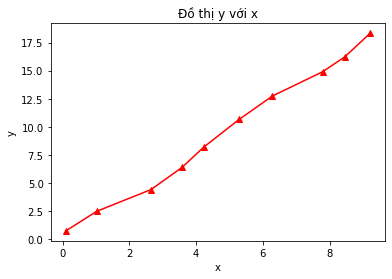

In [1]:
# Đồ thị biểu diễn biến x theo y 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# height (cm)
x = np.random.rand(10).T + np.arange(10)
# weight(kg)
y = np.random.rand(10).T + 2*np.arange(10)
# Visualize data
plt.plot(x,y,'r-^')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Đồ thị y với x')
plt.show()

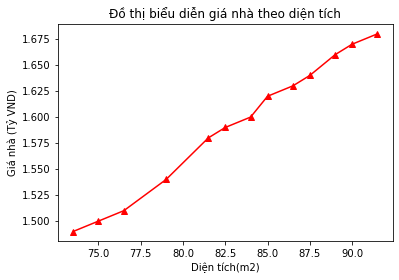

In [3]:
# Trả lời câu 1:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# height (cm)
x = np.array([[73.5,75.,76.5,79.,81.5,82.5,84.,85.,86.5,87.5,89.,90.,91.5]]).T
# weight (kg)
y = np.array([[1.49,1.50,1.51,1.54,1.58,1.59,1.60,1.62,1.63,1.64,1.66,1.67,1.68]]).T

# Visualize data
plt.plot(x,y,'r-^')
plt.xlabel('Diện tích(m2)')
plt.ylabel('Giá nhà (Tỷ VND)')
plt.title('Đồ thị biểu diễn giá nhà theo diện tích')
plt.show()

**Câu 2:** Hãy xây dựng phương trình hồi qui dự báo giá nhà theo diện tích bằng cách tính $w_1$ và $w_0$ theo công thức (1) ở mục **1. hồi qui tuyến tính đơn biến**

In [4]:
w1 = (np.mean(x)*np.mean(y)-np.mean(x*y))/((np.mean(x))**2-(np.mean(x**2)))
w0 = np.mean(y)-w1*np.mean(x)

print('w1: ', w1)
print('w0: ', w0)

w1:  0.011184099238793658
w0:  0.6626458979418968


### 2.1.2. Xây dựng phương trình hồi qui tuyến tính với 2 biến

Giả sử biết thêm thông tin số lượng phòng ngủ là:
$$\mathbf{x_1} = [1,1,2,2,2,2,2,2,2,2,3,3,3]$$

**Câu 3:** Hãy xây dựng phương trình hồi qui dựa theo công thức (2) ở mục 2.

_gợi ý: Chúng ta phải thực hiện các bước sau đây:_

_bước 1: Tạo véc tơ một bằng hàm np.ones(), sau đó sử dụng hàm np.concatenate() để ghép véc tơ 1 với $\mathbf{x, x1}$ để tạo thành $\mathbf{\bar{X}}$_

_bước 2: Sử dụng hàm np.dot() để tích của 2 ma trận. Từ đó tính được $\mathbf{A, b}$ --> $\mathbf{w}$_

_Các hàm sử dụng như bên dưới:_

In [5]:
# Khởi tạo một véc tơ 1 gồm toàn các phần tử 1 kích thước 10
one = np.ones(10)
print('one: \n', one)
# Khởi tạo một véc tơ ngẫu nhiên v.
v = np.random.randn(10)
print('vector v: \n', v)
# concatenate 2 véc tơ one và v. Lưu ý chúng phải có chung shape
X_concat = np.concatenate([one, v])
print('X concate one, v: \n', X_concat)
# tính tích của 2 ma trận. Lưu ý số cột của ma trận liền trước phải bằng số dòng của ma trận liền sau A(m,n).B(n,p)=C(m,p)
np.dot(one, v.T)
# ma trận nghịch đảo của một ma trận vuông khả nghịch A.
A = np.random.randn(2,2)
A_inv = np.linalg.pinv(A)
# kiểm tra tích A và A_inv
print(np.dot(A, A_inv))

one: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
vector v: 
 [-0.00538975  0.6817064  -0.38147942  0.97140503  0.01384508  1.63405707
 -0.79368681 -0.26849936  0.26352442  0.66219529]
X concate one, v: 
 [ 1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.         -0.00538975  0.6817064
 -0.38147942  0.97140503  0.01384508  1.63405707 -0.79368681 -0.26849936
  0.26352442  0.66219529]
[[ 1.00000000e+00  2.95814266e-16]
 [-6.66082103e-17  1.00000000e+00]]


**Câu trả lời:**

In [6]:
x1 = np.array([[1,1,2,2,2,2,2,2,2,2,3,3,3]]).T
one = np.ones(x.shape[0]).reshape(-1, 1)
Xbar = np.concatenate([one, x, x1], axis = 1)
Xbar

array([[ 1. , 73.5,  1. ],
       [ 1. , 75. ,  1. ],
       [ 1. , 76.5,  2. ],
       [ 1. , 79. ,  2. ],
       [ 1. , 81.5,  2. ],
       [ 1. , 82.5,  2. ],
       [ 1. , 84. ,  2. ],
       [ 1. , 85. ,  2. ],
       [ 1. , 86.5,  2. ],
       [ 1. , 87.5,  2. ],
       [ 1. , 89. ,  3. ],
       [ 1. , 90. ,  3. ],
       [ 1. , 91.5,  3. ]])

In [7]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
w

array([[ 0.62942931],
       [ 0.01172607],
       [-0.00571564]])

**Câu 4:** Giải phương trình bằng package sklearn.linear_model

_gợi ý: Xem link hướng dẫn:_

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

**Câu trả lời:**

In [16]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias
X = np.concatenate([x, x1], axis = 1)
regr.fit(X, y)

# Compare two results
print( 'Coefficient : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ )

Coefficient :  [[ 0.01172607 -0.00571564]]
Interception  :  [0.62942931]


**Câu 5:** Dự báo giá nhà khi số lượng phòng là 3 và diện tích là 120 mét vuông.
    

**Câu trả lời:**

In [17]:
regr.predict(np.array([[120, 3]]))

array([[2.01941041]])

**Câu 6: ** Dự báo cho toàn bộ các ngôi nhà và vẽ biểu đồ giá nhà dự báo và thực tế theo trục hoành là diện tích căn hộ.

**Câu trả lời:**

In [18]:
# Predict
yhat = regr.predict(X)
yhat

array([[1.48557958],
       [1.50316868],
       [1.51504214],
       [1.54435731],
       [1.57367247],
       [1.58539854],
       [1.60298764],
       [1.61471371],
       [1.63230281],
       [1.64402887],
       [1.65590234],
       [1.66762841],
       [1.68521751]])

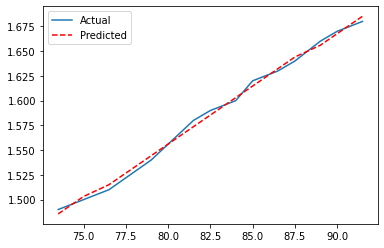

In [19]:
# Visualization
plt.plot(x, y, label = 'Actual')
plt.plot(x, yhat,'r--', label = 'Predicted')
# Show các phần chú thích label
plt.legend()

## 2.2. Hồi qui qua nghịch đảo ma trận

In [20]:
ones = np.ones((X.shape[0], 1))
Xbar = np.concatenate((ones, X), axis = 1)
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)

w = np.dot(np.linalg.inv(A), b)
print('Estimate coeficients: ', str(w))

Estimate coeficients:  [[ 0.62942931]
 [ 0.01172607]
 [-0.00571564]]


## 2.3. Hồi qui với regularization

Regularization là kĩ thuật tránh overfiting bằng cách đưa thêm thành phần liên quan đến norm của các hệ số vào hàm loss function. Norm có thể là bậc 1 hoặc bậc 2. Trong trường hợp bậc 2 ta gọi là **Ridge regression**:

$$\mathcal{L}(\mathbf{w}; \mathbf{X}, \mathbf{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i-\hat{y_i})^2 + \alpha||\mathbf{w}||_{2}^2$$

Đối với trường hợp bậc 1 gọi là **Lasso regression**:

$$\mathcal{L}(\mathbf{w}; \mathbf{X}, \mathbf{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i-\hat{y_i})^2 + \alpha||\mathbf{w}||_1^{2}$$


### 2.3.1. Ridge regression

**Câu 7:** Xây dưng phương trình hồi qui Ridge regression và vẽ biểu đồ giá trị dự báo và giá trị thực tế với trục hoành là diện tích căn hộ.

**Câu trả lời:**

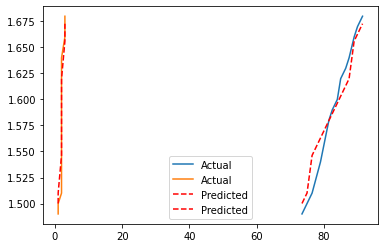

In [21]:
from sklearn.linear_model import Ridge

rid_mod = Ridge(alpha = 0.3, normalize = True)
rid_mod.fit(X, y)

yhat_rid = rid_mod.predict(X)

plt.plot(X, y, label = 'Actual')
plt.plot(X, yhat_rid,'r--', label = 'Predicted')
plt.legend()

### 2.3.2. Lasso regression

**Câu 8:** Xây dưng phương trình hồi qui Lasso regression và vẽ biểu đồ giá trị dự báo và giá trị thực tế với trục hoành là diện tích căn hộ.

**Câu trả lời:**

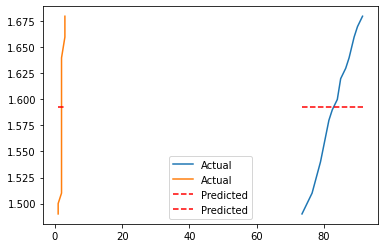

In [23]:
from sklearn.linear_model import Lasso

las_mod = Lasso(alpha = 0.1, normalize = True)
las_mod.fit(X, y)

yhat_las = las_mod.predict(X)

plt.plot(X, y, label = 'Actual')
plt.plot(X, yhat_las,'r--', label = 'Predicted')
plt.legend()

## 3. Thực hành dự báo khách hàng hàng không

**Câu 10:** Với số liệu được lấy từ lưu lượng hành khách sử dụng dịch vụ hàng không qua các năm tại [international airline passengers](https://raw.githubusercontent.com/nhhoang231/Datasets/master/international-airline-passengers.csv). Xây dựng phương trình dự báo lưu lượng hành khách.

**Câu trả lời:**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
data = pd.read_csv('https://raw.githubusercontent.com/nhhoang231/Linear-Regression/master/international-airline-passengers.csv', sep = ',', 
                   header = 0, 
                   index_col = 0)

data.columns = ['Y']
data.head()

,Y
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


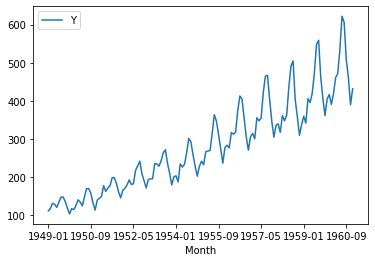

In [26]:
data.plot()

In [27]:
X1 = data.shift(1)
X1.columns = ['Y1']
X2 = data.shift(2)
X2.columns = ['Y2']

### Preprocessing data
Nhận thấy X1, X2 đều bị NaN. Cần fill những giá trị NaN này bằng các giá trị gần sát với thực tế.

In [28]:
X2.head()

,Y2
Month,
1949-01,NaN
1949-02,NaN
1949-03,112.0
1949-04,118.0
1949-05,132.0


In [29]:
X1 = X1.fillna(X1.iloc[1, 0]-(X1.iloc[2, 0]-X1.iloc[1, 0]))

In [30]:
# X2 = X2.fillna(X1.iloc[1, 0]-(X1.iloc[2, 0]-X1.iloc[1, 0]))
delta = X1.iloc[3, 0]-X1.iloc[2, 0]
X2.iloc[1, 0] = X2.iloc[2, 0] - delta
X2.iloc[0, 0] = X2.iloc[1, 0] - delta
X2.head()

,Y2
Month,
1949-01,84.0
1949-02,98.0
1949-03,112.0
1949-04,118.0
1949-05,132.0


### Phân chia train/test

In [31]:
# Tao dataframe X
X = pd.concat((X1, X2), axis = 1)
X.head()

,Y1,Y2
Month,,
1949-01,106.0,84.0
1949-02,112.0,98.0
1949-03,118.0,112.0
1949-04,132.0,118.0
1949-05,129.0,132.0


In [32]:
y = data

In [33]:
X_train, y_train = X.iloc[:-12,:], y.iloc[:-12,]
X_test, y_test = X.iloc[-12:, :], y.iloc[-12:,]

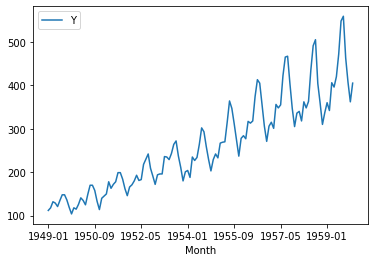

In [34]:
y_train.plot()

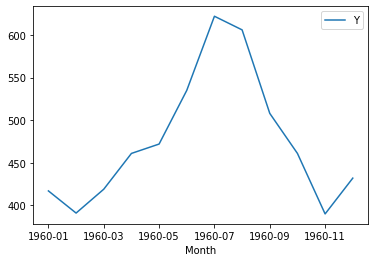

In [35]:
y_test.plot()

### Xây dựng mô hình hồi qui

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)

In [37]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred = model.predict(X_train)

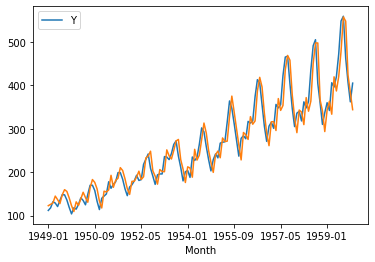

In [39]:
y_train.plot()
plt.plot(y_pred)

### Dự báo trên tập test

In [40]:
y_pred_test = model.predict(X_test)

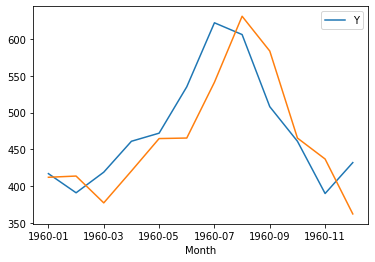

In [41]:
y_test.plot()
plt.plot(y_pred_test)

In [42]:
# danh gia mo hinh tren RMSE
from math import sqrt
def rmse(y, yhat):
    return sqrt(np.mean((y-yhat)**2))

rmse(y_test, y_pred_test)

48.952010456831545

In [43]:
rmse(y_train, y_pred)

29.24144391068895